In [1]:
import os
import cv2
import keras
import urllib

import numpy as np

from PIL import Image
from selenium import webdriver

In [2]:
DATA_PATH = 'C:\\Users\\Qwerty\\Downloads\\captcha_solver\\train\\captcha'
model = keras.models.load_model('saved_models/keras_cifar10_trained_jpj_model.h5')

In [4]:
# testing captcha model
# read image
path = 'C:\\Users\\Qwerty\\Downloads\\captcha_solver\\train\\semakan-saman.png'
img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
if(img.shape[2]==4):
    trans_mask = img[:,:,3] == 0
    img[trans_mask] = [255, 255, 255, 255]
    img = cv2.cvtColor(img, cv2.COLOR_BGRA2GRAY)
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.resize(img, (75, 25), interpolation=cv2.INTER_AREA)
# reshape image
img_np = np.reshape(img, (1, img.shape[0], img.shape[1], 1))
# predict
img_predicted = model.predict(img_np)
img_predicted = np.squeeze(np.argmax(img_predicted,axis=2))
captcha = ''.join([str(x) for x in img_predicted])
# print result
print(captcha)

2026


In [8]:
img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
img.shape

(50, 150, 3)

In [6]:
model.predict(img_np)

[array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)]

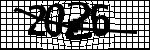

In [5]:
# captcha image
Image.open(path)